# Homework 4 - Algorithmic Methods of Data Mining

# 1. Implementing your own Shazam

In [1]:
import numpy as np      
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd

from pathlib import Path, PurePath   
from tqdm.notebook import tqdm

import os

## Utility Functions

In [134]:
def convert_mp3_to_wav(audio:str) -> str:  
    """Convert an input MP3 audio track into a WAV file.

    Args:
        audio (str): An input audio track.

    Returns:
        [str]: WAV filename.
    """
    if audio[-3:] == "mp3":
        wav_audio = audio[:-3] + "wav"
        if not Path(wav_audio).exists():
                subprocess.check_output(f"ffmpeg -i {audio} {wav_audio}", shell=True)
        return wav_audio
    
    return audio

def plot_spectrogram_and_peaks(track:np.ndarray, sr:int, peaks:np.ndarray, onset_env:np.ndarray) -> None:
    """Plots the spectrogram and peaks 

    Args:
        track (np.ndarray): A track.
        sr (int): Aampling rate.
        peaks (np.ndarray): Indices of peaks in the track.
        onset_env (np.ndarray): Vector containing the onset strength envelope.
    """
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                            sr=sr, hop_length=HOP_SIZE)

    plt.figure()
    ax = plt.subplot(2, 1, 2)
    D = librosa.stft(track)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                            y_axis='log', x_axis='time')
    plt.subplot(2, 1, 1, sharex=ax)
    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks')
    plt.legend(frameon=True, framealpha=0.8)
    plt.axis('tight')
    plt.tight_layout()
    plt.show()

def load_audio_peaks(audio, offset, duration, hop_size):
    """Load the tracks and peaks of an audio.

    Args:
        audio (string, int, pathlib.Path or file-like object): [description]
        offset (float): start reading after this time (in seconds)
        duration (float): only load up to this much audio (in seconds)
        hop_size (int): the hop_length

    Returns:
        tuple: Returns the audio time series (track) and sampling rate (sr), a vector containing the onset strength envelope
        (onset_env), and the indices of peaks in track (peaks).
    """
    try:
        track, sr = librosa.load(audio, offset=offset, duration=duration)
        onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
        peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)
    except Error as e:
        print('An error occurred processing ', str(audio))
        print(e)

    return track, sr, onset_env, peaks

A possible interpretation of the outputs of the 'load_audio_peaks' function is the following: 
 * track (samples of a track):
 * sr (amplitude rate):
 * onset_env (onset strength envelope):
 * peaks (indices of peaks in a song):
 

## Settings

In [183]:
N_TRACKS = 1413
HOP_SIZE = 512
OFFSET = 1.0
DURATION = 30 # TODO: to be tuned!
THRESHOLD = 0 # TODO: to be tuned!

In [ ]:
data_folder = Path("data/mp3s-32k/")
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav")

## Preprocessing

In [ ]:
for track in tqdm(mp3_tracks, total=N_TRACKS):
    convert_mp3_to_wav(str(track))

## Audio signals

In [192]:
tracks = ["01-Mustapha.wav"]

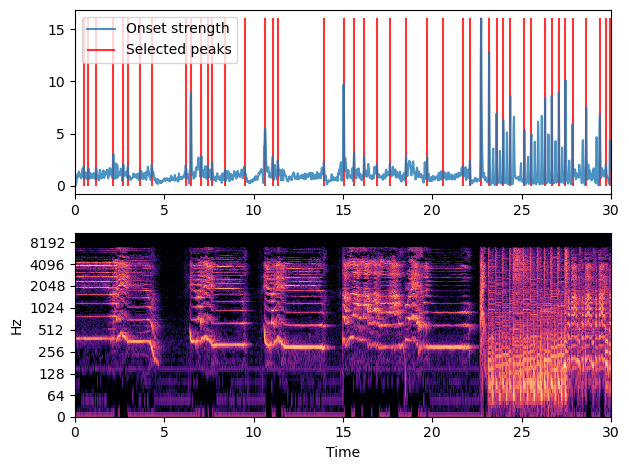

In [193]:
for idx, audio in enumerate(tracks):
    if idx >= 2:
        break
    track, sr, onset_env, peaks = load_audio_peaks(audio, OFFSET, DURATION, HOP_SIZE)
    plot_spectrogram_and_peaks(track, sr, peaks, onset_env)
        

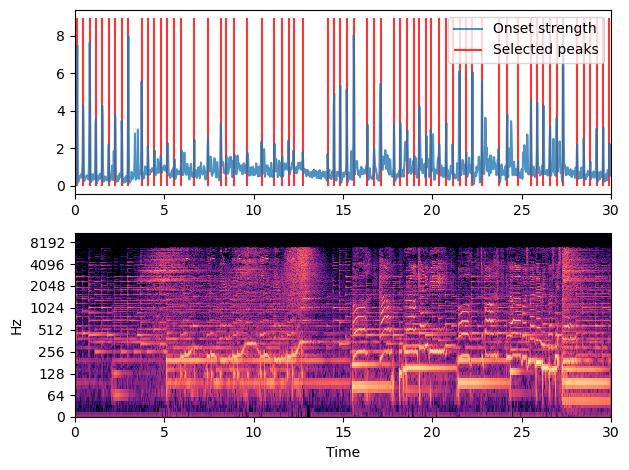

In [191]:
tracks = ["03-Jealousy.wav"]
for idx, audio in enumerate(tracks):
    if idx >= 2:
        break
    track2, sr2, onset_env2, peaks2 = load_audio_peaks(audio, OFFSET, DURATION, HOP_SIZE)
    plot_spectrogram_and_peaks(track, sr, peaks, onset_env)

# Intuitive explanation of Question 1:

### Due to the lack of time, I couldn't implement the first question of this homework. However an intuitive explanation of what could have been done is given below:

Digital songs can be interpreted or parsed as frequencies in a time series. In the last spectograms we the frequencies in each time sampling that was carried out and we can also identify some peaks of frequency. If we extract those peaks and the time in which they happened, we can generate a fingerprint of each song. In this way, each song has a series of peaks of a certain frequency in a certain period of time. 

Problem is different songs can have the same peaks in the same period of time. For this reason, is useful to use a Hash Function, which its solely purpose is to create a unique output for each different input that the function is given. In this way, for two different outputs the Hash Function will always produce different outputs, while for the same input the function will always produce the same output. In other words, the purpose of Hash Functions is to avoid collisions. 

We can design a Hash Function under the Double Hash Function paradigm, since it has been demonstrated that using a linear or a cuadratic approach produces several collisions. In this way, we should've designed a Hash Function that took the vector of frequency and time for each song and produce a unique output for it. The Minhash function refers to simply taken the minimum of the multiple possible hash functions created.

Lastly we should have used LSH to create buckets in which to put the songs that are similar in order to speed up the search since on the contrary the algorithm has to do an intensive search in a vast amount of possibilities. 

###  1.1 Getting your data!

In [131]:
path = "/Users/brauliovillalobos/Documents/Data Science Master's Degree - Sapienza 2021 2023/ADM - Algorithms of Data Mining/HW_4/mp3s-32k"

**Function used to pass each song to the already given 'convert_mp3_to_wav' function. We need to go through each folder and its corresponding subfolders in order to pass the string with the name of each song to the mentioned function.**

In [132]:
def audio_files_conversion(working_directory):
    for dirname, dirs, files in tqdm(os.walk(working_directory)):
        os.chdir(dirname)
        for each_music_track in files:
            if(each_music_track[-3:] == 'mp3'):
                convert_mp3_to_wav(each_music_track)

In [133]:
audio_files_conversion(path)

0it [00:00, ?it/s]

**Auxiliary function used only in case we need to delete the already created .wav files**

In [129]:
#Auxiliary function
def delete_files(working_directory):
    for dirname, dirs, files in tqdm(os.walk(working_directory)):
        os.chdir(dirname)
        for each_music_track in files:
            if(each_music_track[-3:] == 'wav'):
                os.remove(each_music_track)

# 2. Grouping songs together!

We play with a dataset gathering songs from the International Society for Music Information Retrieval Conference. The tracks (songs) include much information. We focus on the track information, features (extracted with librosa library from Python) and audio variables provided by Echonest (now Spotify).

The final goal is to group songs into similar genres, therefore DO NOT use the feature genre in your k-means anaylsis

To solve this task, you must accomplish the next stages:

### 2.1 Getting your data!

Access to the data can be found here:
* echonest.csv
* features.csv
* tracks.csv

Data Scientists are often challenged to do Data Wrangling. The latter is a process of cleaning and unifying messy and complex data sets for easy access and analysis (see more info here). You are supposed to create one single data set by merging tracks.csv, features.csv and echonest.csv. It's your job to find the correct key to join your data sets together. You should end up with a data set of ~13K rows.

In [1]:
#Packages Import
import csv
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import random
%matplotlib inline

## Scikit Learn K Means and K Means ++
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We read the 3 datasets that we will need to carry out the exercise and we do some exploratory analysis on them.

In [2]:
#Read Data
echonest = pd.read_csv('echonest.csv')
features = pd.read_csv('features.csv')
tracks = pd.read_csv('tracks.csv')

## Exploratory Analysis - Understanding the data

In [3]:
echonest.shape, features.shape, tracks.shape

((13129, 250), (106574, 519), (106574, 53))

#### ***************** ECHONEST DATASET **********************

In [4]:
echonest.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [5]:
echonest.track_id.nunique()

13129

In [6]:
echonest.describe()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_latitude,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,9770.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,39.961892,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,15.554275,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,-45.867100,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,37.784827,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,40.781400,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,47.254575,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,68.927500,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


In [7]:
echonest_cols = echonest.columns.tolist()
#[e for e in enumerate(echonest_cols)]
echonest_cols_interest = echonest_cols[:26]

In [8]:
echonest_cols_interest

['track_id',
 'audio_features_acousticness',
 'audio_features_danceability',
 'audio_features_energy',
 'audio_features_instrumentalness',
 'audio_features_liveness',
 'audio_features_speechiness',
 'audio_features_tempo',
 'audio_features_valence',
 'metadata_album_date',
 'metadata_album_name',
 'metadata_artist_latitude',
 'metadata_artist_location',
 'metadata_artist_longitude',
 'metadata_artist_name',
 'metadata_release',
 'ranks_artist_discovery_rank',
 'ranks_artist_familiarity_rank',
 'ranks_artist_hotttnesss_rank',
 'ranks_song_currency_rank',
 'ranks_song_hotttnesss_rank',
 'social_features_artist_discovery',
 'social_features_artist_familiarity',
 'social_features_artist_hotttnesss',
 'social_features_song_currency',
 'social_features_song_hotttnesss']

#### ************** FEATURES DATASET ******************

In [9]:
features.head()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [10]:
features.track_id.nunique()

106574

#### ************** TRACKS DATASET ******************

In [11]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [12]:
tracks.describe()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,79442.637435,0.394946,1.286927,12826.933914,3.212031e+04,19.721452,1.894702,30.041915,12036.770404,39.901626,-38.668642,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,44704.398384,2.268915,3.133035,6290.261805,1.478532e+05,39.943673,6.297679,100.511408,6881.420867,18.240860,65.237220,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,2.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.000000,-45.878760,-157.526855,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,40820.250000,0.000000,0.000000,7793.000000,3.361000e+03,7.000000,0.000000,1.000000,6443.000000,39.271398,-79.997459,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,78983.500000,0.000000,0.000000,13374.000000,8.982000e+03,11.000000,0.000000,5.000000,12029.500000,41.387917,-73.554431,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,119422.750000,0.000000,1.000000,18203.000000,2.363500e+04,17.000000,1.000000,16.000000,18011.000000,48.856930,4.351710,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,155320.000000,53.000000,61.000000,22940.000000,3.564243e+06,652.000000,79.000000,963.000000,24357.000000,67.286005,175.277000,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [13]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

In [14]:
# 106.574 different track ids
tracks.track_id.nunique()

106574

#### What's the link between these sets?

So as we saw with the exploratory data analysis, the echonest dataset has 13.129 unique track_ids, while the features and tracks dataset have 106.574 unique tracks_id. Since the 3 datasets have this field in common, we decided to use the 'track_id' as a key to join the datasets. At the end, we will work with approx 13K rows or observations, just as indicated in the homework description. 

* Echonest: has some information about the audio features, metadata, ranks and social features, along with other numerical fields. 
* Features dataset: contains a lot of numerical fields that apparently characterize the tracks. 
* Tracks: it contains a lot of information on the album, the artist and the track. 

#### Unifying the datasets

In [15]:
echonest_df = pd.DataFrame(echonest)
features_df = pd.DataFrame(features)
tracks_df = pd.DataFrame(tracks)

In [16]:
df = echonest_df.merge(features_df, on = 'track_id')
df = df.merge(tracks_df, on = 'track_id')

In [17]:
df.shape

(13129, 820)

In [18]:
df.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music


### ************ Dimensionality Reduction******************

### 1. Features Dataset

We start by applying a PCA to the Features dataset. The reason why we chose to apply this method on this particular dataset is that all the variables are numeric. As PCA is performed on the covariance matrix, we decided that this method was appropiate as we don't need to carry out any conversion of categorical variables into numerical ones. We then proceed to:

* First extract the variables corresponding to the Features dataset
* Normalize the variables
* Apply PCA

#### A) PCA

In [19]:
features_dim_red = features.merge(df[['track_id']])

In [20]:
features_dim_red.shape

(13129, 519)

In [21]:
features_dim_red.iloc[:,:50].describe()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,0.140681,0.067709,0.177723,0.061883,0.079323,0.117992,0.075996,0.170159,0.065728,...,0.248416,0.250672,0.239833,0.240035,0.244977,0.248397,0.236079,0.228912,0.225379,0.006546
std,28950.422182,1.593070,1.432496,1.575761,1.150555,1.963091,2.106408,1.403370,4.065834,2.107996,...,0.075810,0.086856,0.078652,0.076461,0.084201,0.077787,0.086800,0.076818,0.083070,0.023146
min,2.000000,-1.922728,-1.905314,-1.925910,-1.914968,-1.841308,-1.764899,-1.794146,-1.700912,-1.781011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12986.000000,-0.614674,-0.649604,-0.593908,-0.626463,-0.647167,-0.607263,-0.629585,-0.604848,-0.655270,...,0.209685,0.204622,0.199616,0.200788,0.200132,0.206906,0.187666,0.187593,0.178358,0.000000
50%,28097.000000,-0.159293,-0.219846,-0.134305,-0.187820,-0.211127,-0.157157,-0.193361,-0.153645,-0.226539,...,0.244650,0.245376,0.238586,0.238383,0.238907,0.242231,0.232814,0.228957,0.225140,0.000000
75%,45021.000000,0.469450,0.390960,0.524311,0.430300,0.409552,0.471887,0.436058,0.496591,0.407977,...,0.289024,0.296126,0.280434,0.278064,0.285239,0.287616,0.279312,0.269051,0.268715,0.000000
max,124911.000000,48.023846,43.409588,67.386223,20.028009,164.880539,194.719330,73.180061,439.131195,188.034485,...,0.618711,0.735352,0.672450,0.633601,0.654713,0.638823,0.666996,0.628589,0.668156,0.338551


In [22]:
# Checking for missing values
missing_values = features_dim_red.isnull().sum()*100/len(features_dim_red)

In [23]:
missing_values_df = pd.DataFrame({'columns_name':features_dim_red.columns,
                                 'percent_missing': missing_values})

In [24]:
missing_values_df[missing_values_df['percent_missing']!=0]

,columns_name,percent_missing


As the dataset doesn't have any missing values, we don't need to carry out any pre processing like variable imputation and removal. 

In [25]:
X = features_dim_red.values
X = scale(X)

In [26]:
pca = PCA(n_components = 100)

In [27]:
my_x = pca.fit_transform(X)

In [28]:
pd.DataFrame(my_x)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.682700,-1.972250,-6.945722,4.123952,1.746506,-6.775717,-0.582238,1.560012,-0.299363,3.423884,...,-0.645284,0.691570,0.136073,-0.357948,-0.302737,-0.916379,-0.162020,-0.511312,-0.623336,0.418420
1,4.549089,-4.679155,-4.245711,-3.105413,1.484391,1.791312,4.217968,4.544024,-1.989590,3.750286,...,-0.670914,0.118802,0.761497,-0.647149,0.629200,-0.281426,0.488580,-0.950354,0.026099,0.224926
2,1.182898,-2.884529,-3.374715,-1.301859,2.106503,0.489537,-0.781693,3.433570,-0.171874,1.558322,...,1.565134,0.441714,0.446740,-0.375043,-0.175447,-0.801522,1.949478,0.317994,0.704514,0.044923
3,6.590844,3.982656,-4.903720,-0.756118,1.156998,1.923551,3.046958,4.977134,-2.099010,2.061624,...,-0.188123,0.131098,1.646691,0.337134,-0.324039,1.163864,-0.016237,1.489947,-0.942495,-1.556207
4,2.088385,-6.698105,-2.549170,-1.129358,-0.662261,0.969967,-2.658412,5.864346,0.522186,0.650108,...,0.806238,0.220905,0.811803,-0.194088,-0.376171,0.504973,0.488953,0.835607,-0.728334,0.276466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,6.739351,-4.232907,-0.782726,-2.592589,-0.835965,-1.018618,-1.012735,2.696416,0.816219,2.282033,...,0.087615,-0.577959,-0.195335,1.104792,-0.493158,0.529923,-0.040910,0.256669,1.559724,0.242409
13125,15.975099,-0.179112,-2.460739,6.231220,1.418114,-0.664343,-3.285757,4.680613,-0.128811,-7.634953,...,-0.698500,0.386115,0.035315,1.899654,0.208708,-0.078448,-1.389468,0.277105,0.746662,-0.138527
13126,18.313394,0.265516,-3.400826,1.468163,3.651870,-4.851893,-2.126438,1.269233,2.994926,-3.379588,...,1.209043,0.051977,-0.449915,1.257374,1.091164,0.801060,-0.807060,0.228443,0.963208,0.088354
13127,-2.875521,-2.425830,-1.424475,-4.194328,-1.283783,-0.838330,6.240143,-0.235903,-0.973264,0.733861,...,0.005241,-0.880460,0.870596,1.382665,-0.029677,1.942822,-0.517467,0.602360,0.530410,-0.203244


In [29]:
var = pca.explained_variance_ratio_

In [30]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
var1

array([12.04, 19.79, 23.86, 27.06, 29.84, 32.49, 35.11, 37.66, 40.08,
       42.2 , 44.09, 45.85, 47.39, 48.87, 50.26, 51.6 , 52.8 , 53.91,
       54.95, 55.9 , 56.77, 57.59, 58.34, 59.07, 59.78, 60.46, 61.13,
       61.78, 62.39, 62.97, 63.53, 64.05, 64.57, 65.08, 65.56, 66.03,
       66.48, 66.92, 67.35, 67.77, 68.18, 68.59, 68.98, 69.36, 69.73,
       70.09, 70.44, 70.78, 71.12, 71.46, 71.79, 72.12, 72.44, 72.76,
       73.07, 73.37, 73.67, 73.96, 74.25, 74.53, 74.81, 75.09, 75.36,
       75.63, 75.9 , 76.16, 76.42, 76.67, 76.92, 77.17, 77.42, 77.66,
       77.9 , 78.13, 78.36, 78.59, 78.81, 79.03, 79.25, 79.46, 79.67,
       79.88, 80.08, 80.28, 80.48, 80.68, 80.88, 81.07, 81.26, 81.45,
       81.63, 81.81, 81.99, 82.17, 82.35, 82.53, 82.71, 82.88, 83.05,
       83.22])

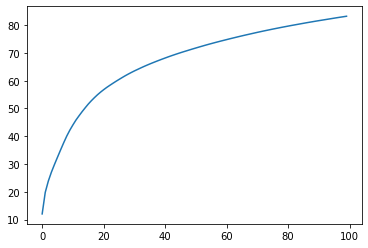

In [31]:
plt.plot(var1)

#### Results interpretation:

PCA allowed us to reduce dimensionality from 519 features to 85 preserving 80.41% of the total variance. Although this represents a decrease of 83.6% in the total number of original features, handling 100 components only for this first dataset is still a high number. For this reason, we will try other methods of dimensionality reduction and test their performance. 

### 2. Echonest Dataset

In [32]:
echonest_df.shape

(13129, 250)

First we make a simple count of the null values, as in a first overseen of the data it appears to be a sparse data. 

In [33]:
missing_values = echonest_df.isnull().sum()*100/len(echonest_df)
missing_values_df = pd.DataFrame({'columns_name':echonest_df.columns,
                                 'percent_missing': missing_values})

In [34]:
(missing_values_df[missing_values_df['percent_missing'] > 0]).sort_values(by = 'percent_missing', ascending = False)

,columns_name,percent_missing
ranks_song_currency_rank,ranks_song_currency_rank,84.515195
ranks_song_hotttnesss_rank,ranks_song_hotttnesss_rank,83.197502
metadata_album_date,metadata_album_date,79.305355
ranks_artist_hotttnesss_rank,ranks_artist_hotttnesss_rank,78.490365
ranks_artist_discovery_rank,ranks_artist_discovery_rank,78.482748
ranks_artist_familiarity_rank,ranks_artist_familiarity_rank,78.482748
metadata_album_name,metadata_album_name,78.124762
metadata_artist_latitude,metadata_artist_latitude,25.584584
metadata_artist_location,metadata_artist_location,25.584584
metadata_artist_longitude,metadata_artist_longitude,25.584584


*Decision*: In the last table we can appreciate there are variables with almost 80% of the data missing. Taking into account that we consider that a variable that has almost 80% of the observations missing, we decide to remove the following variables from the dataset to analyze:

* ranks_song_currency_rank
* ranks_song_hotttnesss_rank
* metadata_album_date
* ranks_artist_hotttnesss_rank
* ranks_artist_discovery_rank
* ranks_artist_familiarity_rank
* metadata_album_name

Additionally, the variables metadata_artist_latitud, metadata_artist_location and metadata_artist_longitude describe the same information which is localization of the artist. Given that the latitude and longitude are numerical values and therefore easier to incorporate in a PCA without carrying out any conversion and also that metadata_artist_location contains similar information, we decided to remove

* the metadata_artist_location 

from the set to analyze. We decide to keep for the moment the metadata_artist_latitude and metadata_artist_longitude despite the fact that they have 25% of the data missing. 

Finally, the variables

* metadata_artist_name
* metadata_release

Are also removed from the dimensionality reduction as they're of string type which are not categorical but describe the name of the artist and the album name. Therefore as they're not numerical and shouldn't be converted to categorical, we decide to leave them out. 

In [35]:
list_to_remove = list(missing_values_df[missing_values_df['percent_missing'] > 78].index)
list_to_remove.append('metadata_artist_location')
list_to_remove.append('metadata_artist_name')
list_to_remove.append('metadata_release')
list_to_remove.append('metadata_artist_latitude')
list_to_remove.append('metadata_artist_longitude')

In [36]:
echonest_df = echonest_df.drop(list_to_remove, axis = 1)
echonest_df.shape

(13129, 238)

#### A) PCA

In [37]:
Y = echonest_df.values
Y = scale(Y)

In [38]:
pca_y = PCA(n_components = 85)

In [39]:
my_y = pca_y.fit_transform(Y)

In [40]:
var2 = np.cumsum(np.round(pca_y.explained_variance_ratio_,decimals = 4)*100)
var2

array([11.37, 20.01, 24.9 , 28.14, 30.89, 33.47, 35.79, 38.06, 40.24,
       42.24, 44.12, 45.91, 47.68, 49.35, 50.97, 52.55, 53.96, 55.35,
       56.7 , 57.95, 59.14, 60.28, 61.33, 62.33, 63.32, 64.27, 65.2 ,
       66.09, 66.95, 67.78, 68.58, 69.32, 70.03, 70.73, 71.42, 72.11,
       72.78, 73.42, 74.06, 74.69, 75.3 , 75.87, 76.43, 76.97, 77.51,
       78.04, 78.56, 79.07, 79.58, 80.06, 80.53, 80.99, 81.45, 81.9 ,
       82.35, 82.79, 83.21, 83.63, 84.04, 84.44, 84.83, 85.22, 85.59,
       85.96, 86.32, 86.67, 87.02, 87.35, 87.68, 87.99, 88.29, 88.58,
       88.86, 89.13, 89.4 , 89.66, 89.92, 90.17, 90.42, 90.67, 90.91,
       91.14, 91.37, 91.59, 91.81])

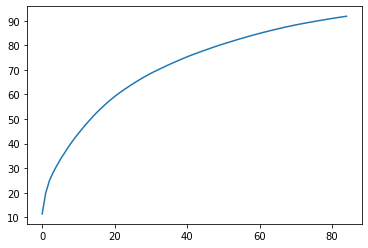

In [41]:
plt.plot(var2)

**Results interpretation:** 

If we take 50 components, we account for slightly more than 80% of the total variance. In this way, we reduce the dimensionality in 79% as we had initially -after removing the variables with null values- 239 variables and we are left with 50 components. 

### 3. Tracks Dataset

We start by counting the null values in the dataset

In [42]:
tracks_df = tracks.merge(df[['track_id']])
tracks_df.shape

(13129, 53)

* track_lyricist: removed since almost all observations of this variable are filled with null values. 
* track_publisher: removed since almost all observations of thie variable are filled with null values. 
* track_information: removed since the variable is filled almost filly by null values. Additionally, the data contained doesn't give any additional useful information to the clustering. 
* track_composer: removed since almost all the observations are filled with null values. With the observations that are not filled with null values, there're 505 unique composers. However some of them refer to the same composer with an additional collaboration, which means that if we parse this variable, we would have less than 505 categories. 
* artist_active_year_end: removed since almost all observations are filled with null values.
* artist_wikipedia_page: removed as this variable won't give us any additional useful information and almost all observations are filled with null values. 
* track_date_recorded: removed since almost all observations are filled with null values
* artist_related_projects: removed due to the number of null values
* album_information: removed as the variable is filled with text that can't be converted into categories. An additional analysis should be carried out if we were interested in extracting useful information from this field. 
* artist_associated_labels: removed as not only the variable is null for the 86% of observations but also because it contains text information which needs an special process to parse it into categorical values in case we decided to use it. Since it's a complicated process to just obtain additional information for 14% of the total observations, we decide to remove the variable.
* album_engineer: removed as not only a lot of variables have null values but also as the variable contains strings with 622 unique categories, which in some cases correspond to the same engineer but written differently. The process to clean this data surpasses the potential additional information we could gather, as 86% of the observations have null values. 
* album_producer: removed for the same reasons as album_engineer variable
* artist_active_year_being: 76 unique categories but a significant number of them have null values. 
* artist_latitude & artist_longitude: 
* artist_location: has 34% of null variables. Will be removed in the initial analysis but could be used to impute the language which has 86% of null values.
* artist_bio: removed as it's made of texts which can't be converted into categorical values
* artist_website: removed as it contains the link to the artist website, which won't be useful as long as we don't carry out another type of analysis. 
* album_information: removed as it contains texts which can't be converted into categorical variables.


*
*
*
*






* track_genre_top: is the variable of interest to cluster by. It has 16 unique categories. MUST BE REMOVED FROM THE DIMENSIONALITY REDUCTION. 
* album_type: can be converted into categorical variables to analyze.
* track_language_code: despite having a lot of null values, can be parsed as a categorical value as long as we carry out an imputation process for the missing values. 
* artist_members: 4015 different categories
* album_information: could be converted into categorical variables.



In [43]:
missing_values_t = (tracks_df.isnull().sum()*100/len(tracks_df))
missing_values_t = pd.DataFrame({'columns_name': tracks_df.columns,
                                'percent_missing': missing_values_t})

missing_values_t[missing_values_t['percent_missing']>0].sort_values(by = "percent_missing", ascending = False)

,columns_name,percent_missing
track_lyricist,track_lyricist,99.436362
track_publisher,track_publisher,98.842258
artist_active_year_end,artist_active_year_end,96.237337
track_composer,track_composer,96.008835
track_information,track_information,93.761901
artist_wikipedia_page,artist_wikipedia_page,90.623810
artist_related_projects,artist_related_projects,86.716429
artist_associated_labels,artist_associated_labels,82.809049
track_date_recorded,track_date_recorded,81.605606
album_engineer,album_engineer,77.888643


There is a significant number of variables with null values. In a first attempt we will ignore all these variables regardless of the percentage of null values they have.

In [44]:
variables_to_remove_t = list(missing_values_t[missing_values_t['percent_missing']>0].columns_name.index) #All variables with null values
tracks_var_removed = tracks_df.drop(variables_to_remove_t, axis = 1)

In [45]:
tracks_df.columns

Index(['track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'track_listens',
  

Variables with no missing values:

* track_id: removed as it is the identifier of each track to analyze. 
* album comments: removed as it's a categorical value in which more than 77% of the total dataset has album comments. 
* album_favorites: removed as it's a categorical variable. 
* album_id: removed as it's a categorical variable.
* album_tags: removed as it's a categorical variable.
* album_title: removed as it's a categorical variable.
* album_tracks: removed as it's a categorical variable. (this has potential)
* artist_comments: removed as it's a categorical variable.
* artist_favorites: removed as it's a categorical variable
* artist_id: removed as it's a categorical variable
* artis_name: removed as it's a categorical variable
* artist_tags: removed as it's a categorical variable made up of strings. 
* set_split: removed as it's a categorical variable that indicates to which set the observation belongs: training, testing or validation.
* set_subset: removed as it's a categorical variable. However, this could be taken into account for future analyses.
* track_bit_rate: removed as it's not clear what it represents.
* track_comments: removed as it's a categorical variable in which almost all the tracks have 0 comments.
* track_date_created: removed as it's a date. 
* track_bit_
* track_genres: removed 
* track_genres_all: removed
* track_interest:
* track_listens:
* track_number:
* track_tags: removed

In [ ]:
#remove_not_null = ['track_id','album_comments','album_favorites','album_id','album_tags','album_title','album_tracks',
#                  'artist_comments','artist_favorites','artist_id','artist_name','artist_tags','set_split','set_subset',
#                  'track_bit_rate','track_comments','track_date_created','track_genres','track_genres_all','track_tags']

In [46]:
remove_not_null = ['track_id','album_comments','album_id','album_tags','album_title',
                  'artist_id','artist_name','artist_tags','set_split','set_subset',
                  'track_bit_rate','track_comments','track_date_created','track_genres','track_genres_all','track_tags']

In [47]:
tracks_var_removed = tracks_var_removed.drop(remove_not_null, axis = 1)

In [48]:
tracks_var_removed.shape

(13129, 10)

#### *** Dimensionality Reduction***

In [49]:
Z = tracks_var_removed.values
Z = scale(Z)

In [50]:
pca_z = PCA(n_components = 9)

In [51]:
my_z = pca_z.fit_transform(Z)

In [52]:
var3 = np.cumsum(np.round(pca_z.explained_variance_ratio_,decimals = 4)*100)
var3

array([37.29, 54.37, 68.12, 78.  , 86.09, 92.24, 96.01, 97.54, 98.83])

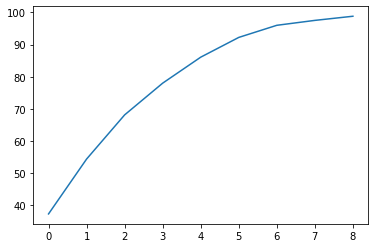

In [53]:
plt.plot(var3)

**Results interpretation:** 

If we take 5 components, we account for more than 80% of the total variance. In this way, we reduce the dimensionality in 50% as we had initially -after removing the variables with null values- 10 variables and we are left with 5 components. 

#### Union of Datasets
We proceed to join the dimensionality reducted datasets by taking the number of components in the aforementioned comments

In [54]:
features_dim_reducted = pd.DataFrame(my_x[:,:86])

In [55]:
for cols in features_dim_reducted.columns:
    features_dim_reducted.rename(columns = {cols:'Comp_x_'+str(cols)},inplace = True)

In [56]:
echonest_dim_reducted = pd.DataFrame(my_y[:,:51])

In [57]:
for cols in echonest_dim_reducted.columns:
    echonest_dim_reducted.rename(columns = {cols:'Comp_y_'+str(cols)},inplace = True)

In [59]:
tracks_dim_reducted = pd.DataFrame(my_z[:,:5])

In [60]:
for cols in tracks_dim_reducted.columns:
    tracks_dim_reducted.rename(columns = {cols:'Comp_z_'+str(cols)},inplace = True)

In [61]:
df_to_analyze = features_dim_reducted.join(echonest_dim_reducted)
df_to_analyze = df_to_analyze.join(tracks_dim_reducted)

In [62]:
df_to_analyze.insert(0,'track_id',df.loc[:,'track_id'])

We should stack those variables that we consider might help us to carry out a better clustering. For this, we select variables and stack them together to the dataset composed by the components, by using the track_id variable as key. 

The following variables might help us carry out a better clustering:
* metadata_artist_location --> from echonest dataset. Not considered since it has 3359 null values. 
* album_listens --> from tracks dataset. Considered as some genres might have a little popularity and therefore number of listens while others might have a big popularity and number of listens.
* album_tracks --> from tracks dataset. Considered as some genres might have a little number of tracks while others a lot of tracks.
* artist_latitude --> from tracks dataset. Not considered as it has a significant amount of missing values.
* artist_longitude --> from tracks dataset. Not considered as it has a significant amount of missing values.
* artist_location --> from tracks dataset. Not considered as it has a significant amount of missing values. Additionally the variable is a string and not standard since equal locations have been parsed and multiple ways. We decide to ignore the variable. 
* track_duration --> from tracks dataset. Included as tracks from some genres might have a little duration (for example latinamerican music), while other genres tend to have a bigger duration (for example metal genre).
* track_language_code --> from tracks dataset. Not considered as it has a significant amount of missing values. 

In [89]:
df_to_analyze = df_to_analyze.merge(df[['track_id','track_duration','album_listens','album_tracks']], on = 'track_id')

## 2.3 Clustering!

**1. Implement the K-means clustering algorithm (not ++: random initialization). We ask you to write the algorithm from scratch following what you learned in class.**

In [102]:
def kmeans(my_x_test, k, max_iter=300):
    m=my_x_test.shape[0] #number of observations
    f=my_x_test.shape[1] #number of features.
    
    diff_centroids = True
    iteration_counter = 0
    cluster = np.zeros(m) #Vector to save the cluster number to which each observation will be assigned to
    
    init_centroids = random.sample(range(0, m), k) #Random initialization of k number of centroids. Generate k numbers between 0 and m
    centroids = []
    for i in init_centroids: #Take k rows of my_x according to the index produced in init_centroids 
        centroids.append(my_x_test[i]) #Put each row of my_x that will serve as initialization in an array                      
    
    while (diff_centroids) and (iteration_counter < max_iter):
        for i, row in enumerate(my_x_test): #For each row in the my_x we will compare it to each centroid
            mn_dist = float('inf') #Initialization of distance
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids): #For each centroid we will compare it to the selected row in the outer for
                d = np.sqrt(sum([(centroid[j]-row[j])**2 for j in range(f)])) #Compute the euclidean distance of each index of the centroid to the corresponding index in the row
            # store closest centroid
                if mn_dist > d: #Redefine the minimum distance of the row to a centroid in case its distance is smaller than with respect to previous centroids
                    mn_dist = d
                    cluster[i] = idx #Associate the observation to the cluster with the smallest distance to a centroid
        
        
        new_centroids = pd.DataFrame(my_x_test).groupby(by=cluster).mean().values #Redefine the clusters as the mean
        
        #StoppingClause: if no observation is reassigned to another centroid, then the algorithm stops
        if np.array_equal(new_centroids,centroids): #If centroids from last iteration and new centroids from this iteration are equal
            diff_centroids = False
            print("Stopping Clause!")
        else:
            centroids = new_centroids
        
        #print(iteration_counter)
        iteration_counter += 1
    return centroids, cluster

**2. Find an optimal number of clusters. Use at least two different methods. In case that your algorithms provide different optimal K's, select one of them and explain why you chose it.**

#### 1st Method: Elbow Method Implementation

In [107]:
def elbow_method(df_to_analyze,num_clusters_to_test):
    m=(df_to_analyze.shape[0])
    distortion_list = []
    
    for k_em in range(1,num_clusters_to_test): # Runs k means with different number of clusters
        centroids_em,cluster_em = kmeans(df_to_analyze,k_em,500) #Runs k means on the desired dataframe
        distortion = np.sum([(df_to_analyze[t]-centroids_em[int(cluster_em[t])])**2 for t in range(m)]) #Calculate distortion: distance to centroid of the corresponding centroid
        
        distortion_list.append(distortion)
        print("Number of clusters:", k_em)
        print("Distortion list:", distortion_list)
    
    return distortion_list

In [96]:
df_to_analyze.iloc[:,1:]

,Comp_x_0,Comp_x_1,Comp_x_2,Comp_x_3,Comp_x_4,Comp_x_5,Comp_x_6,Comp_x_7,Comp_x_8,Comp_x_9,...,Comp_y_49,Comp_y_50,Comp_z_0,Comp_z_1,Comp_z_2,Comp_z_3,Comp_z_4,track_duration,album_listens,album_tracks
0,2.682700,-1.972250,-6.945722,4.123952,1.746506,-6.775717,-0.582238,1.560012,-0.299363,3.423884,...,-0.918908,-0.445562,-0.096624,0.169828,-0.372131,-0.457243,-0.504436,168,6073,7
1,4.549089,-4.679155,-4.245711,-3.105413,1.484391,1.791312,4.217968,4.544024,-1.989590,3.750286,...,-1.236587,-0.307246,-0.189604,0.074650,-0.362819,-0.093573,-0.456982,237,6073,7
2,1.182898,-2.884529,-3.374715,-1.301859,2.106503,0.489537,-0.781693,3.433570,-0.171874,1.558322,...,0.531624,-0.005856,-0.048305,0.119385,-0.124355,-0.155402,-0.231244,206,6073,7
3,6.590844,3.982656,-4.903720,-0.756118,1.156998,1.923551,3.046958,4.977134,-2.099010,2.061624,...,-2.445534,-0.688355,7.049712,4.938425,-0.247179,-0.662143,0.595016,161,47632,2
4,2.088385,-6.698105,-2.549170,-1.129358,-0.662261,0.969967,-2.658412,5.864346,0.522186,0.650108,...,1.218699,0.559095,-0.129853,0.081141,-0.230402,-0.191617,-0.343364,207,6073,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,6.739351,-4.232907,-0.782726,-2.592589,-0.835965,-1.018618,-1.012735,2.696416,0.816219,2.282033,...,0.359633,1.784361,0.728273,0.864857,0.707490,0.187519,0.122500,268,55904,14
13125,15.975099,-0.179112,-2.460739,6.231220,1.418114,-0.664343,-3.285757,4.680613,-0.128811,-7.634953,...,-0.378636,1.060611,-0.053869,0.102033,0.676972,0.128038,0.099015,244,55904,14
13126,18.313394,0.265516,-3.400826,1.468163,3.651870,-4.851893,-2.126438,1.269233,2.994926,-3.379588,...,-1.053823,-0.068969,-0.118053,0.064442,0.624957,0.811290,0.131603,382,55904,14
13127,-2.875521,-2.425830,-1.424475,-4.194328,-1.283783,-0.838330,6.240143,-0.235903,-0.973264,0.733861,...,-1.117075,-0.279681,-0.038507,0.066090,0.820374,0.424950,0.276135,290,55904,14


In [111]:
df_to_analyze_test = df_to_analyze.iloc[:,1:145].values

Stopping Clause!
Number of clusters: 1
Distortion list: [35993502407335.98]
Stopping Clause!
Number of clusters: 2
Distortion list: [35993502407335.98, 13562452552715.096]
Stopping Clause!
Number of clusters: 3
Distortion list: [35993502407335.98, 13562452552715.096, 6312955497952.386]
Stopping Clause!
Number of clusters: 4
Distortion list: [35993502407335.98, 13562452552715.096, 6312955497952.386, 3026541786321.0674]
Stopping Clause!
Number of clusters: 5
Distortion list: [35993502407335.98, 13562452552715.096, 6312955497952.386, 3026541786321.0674, 1916875108172.1255]
Stopping Clause!
Number of clusters: 6
Distortion list: [35993502407335.98, 13562452552715.096, 6312955497952.386, 3026541786321.0674, 1916875108172.1255, 1375871562704.652]
Stopping Clause!
Number of clusters: 7
Distortion list: [35993502407335.98, 13562452552715.096, 6312955497952.386, 3026541786321.0674, 1916875108172.1255, 1375871562704.652, 1198500088755.7568]
Stopping Clause!
Number of clusters: 8
Distortion list:

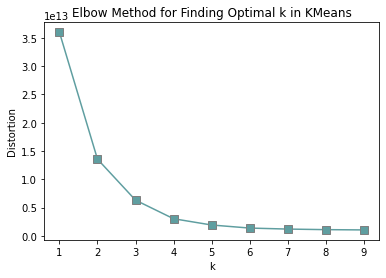

In [112]:
number_of_clusters_to_test = 10 #Define the number of clusters to test

my_list_r = elbow_method(df_to_analyze_test,number_of_clusters_to_test) 

K = list(range(1,number_of_clusters_to_test))
# Elbow Method Plot
plt.plot(K, my_list_r, 's-', markersize=8, color='cadetblue', mec='gray')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Distortion')
plt.title('Elbow Method for Finding Optimal k in KMeans')
plt.show()

#### **Interpretation - Elbow Method**:
Based on the output given by the Elbow Method, it seems that we could pick 3 or 4 clusters as it is in these values of k in which the distortion seems to start to converge. We will take for the moment 4 clusters as this is the number that appears more correct, however depending on the results we could also decide to use k=3. 

#### 2nd Method: 

#### **Interpretation:**

**3. Run the algorithm on the data that you got from the dimensionality reduction.**

In [113]:
X = df_to_analyze.iloc[:,1:145].values
centroids, cluster = kmeans(X, 4)

Stopping Clause!


#### **Interpretation - k means self implementation**:
Once we run the self-implemented version of k means we can see there are:

* Cluster 0: 43 observations were assigned to this cluster.
* Cluster 1: 811 observations were assigned to this cluster.
* Cluster 2: 12052 observations were assigned to this cluster.
* Cluster 3: 223 observations were assigned to this cluster.

We will compare these results with the ones given my Kmeans++.

In [133]:
from collections import Counter
Counter(cluster)

Counter({2.0: 12052, 1.0: 811, 3.0: 223, 0.0: 43})

**4. Then, use the already implemented version of k-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results.**

In [129]:
kmeans_scikit = KMeans(init="k-means++", n_clusters=4, max_iter=300)

kmeans_scikit_result = kmeans_scikit.fit(X)

#### **Interpretation - k means ++**:
Once we run kmeans ++ we can see there are:

* Cluster 0: 12052 observations were assigned to this cluster.
* Cluster 1: 223 observations were assigned to this cluster.
* Cluster 2: 43 observations were assigned to this cluster.
* Cluster 3: 811 observations were assigned to this cluster.


In [134]:
Counter(labels_assigned)

Counter({0: 12052, 3: 811, 1: 223, 2: 43})

In [143]:
labels_assigned

array([0, 0, 0, ..., 3, 3, 0], dtype=int32)

#### **Interpretation k means vs kmeans ++**:
Something weird is that we can see the number of observations assigned to centroids is the same between k means and kmeans ++. For instance 12052 observations were assigned to cluster 2 in k means and to cluster 0 in kmeans++. Therefore the number of observations assigned to each cluster doesn't differ if the method used is k means and kmeans++. However we should me sure that the centroid that describes for example Cluster 2 in k means is the same centroid of Cluster 0 in kmeans ++. 

Effectively, we can appreciate that centroids are the same but the label that each clustering method used to identify each centroid is different. Therefore:

* Cluster 0 in k means is Cluster 2 in kmeans ++
* Cluster 1 in k means is Cluster 3 in kmeans ++
* Cluster 2 in k means is Cluster 0 in kmeans ++
* Cluster 3 in k means is Cluster 1 in kmeans ++

For this reason, we conclude that the results given by k means self-implemented and kmeans ++ are exactly the same. However there is a significant difference in the time that both methods use to give a result, being kmeans ++ considerably faster than the k means self-implementation. 

In [142]:
centroids_self_implementation = pd.DataFrame(centroids)
centroids_self_implementation

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,2.686404,-2.386625,2.242078,0.869284,1.728047,0.726106,0.453333,0.455563,-0.251203,-1.241046,...,-0.378406,0.108122,0.123804,17.654991,-3.219767,-0.239548,0.178238,-1.928173,211.953488,613818.813953
1,-2.339481,-0.588309,0.132568,-0.097473,0.550786,0.345640,0.383430,-0.148063,-0.452591,-0.304450,...,-0.117986,0.004422,0.093450,1.959029,-0.967510,0.838322,0.104477,-0.780500,229.954377,96154.043157
2,0.298274,0.049986,0.009170,-0.009100,-0.063011,-0.028660,-0.036066,0.001433,0.022953,0.046358,...,0.015518,-0.001126,-0.003805,-0.291181,0.103541,-0.073663,-0.010541,0.091979,251.092350,9888.318453
3,-8.130040,-0.101734,-1.410027,0.678649,1.069128,0.151893,0.467345,0.373164,0.453897,-1.158872,...,-0.336637,0.023914,-0.158102,5.207941,-1.456405,0.978485,0.155365,-1.760665,213.125561,250914.358744


In [141]:
centroids_kplusplus = pd.DataFrame(kmeans_scikit_result.cluster_centers_)
centroids_kplusplus

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.298274,0.049986,0.009170,-0.009100,-0.063011,-0.028660,-0.036066,0.001433,0.022953,0.046358,...,0.015518,-0.001126,-0.003805,-0.291181,0.103541,-0.073663,-0.010541,0.091979,251.092350,9888.318453
1,-8.130040,-0.101734,-1.410027,0.678649,1.069128,0.151893,0.467345,0.373164,0.453897,-1.158872,...,-0.336637,0.023914,-0.158102,5.207941,-1.456405,0.978485,0.155365,-1.760665,213.125561,250914.358744
2,2.686404,-2.386625,2.242078,0.869284,1.728047,0.726106,0.453333,0.455563,-0.251203,-1.241046,...,-0.378406,0.108122,0.123804,17.654991,-3.219767,-0.239548,0.178238,-1.928173,211.953488,613818.813953
3,-2.339481,-0.588309,0.132568,-0.097473,0.550786,0.345640,0.383430,-0.148063,-0.452591,-0.304450,...,-0.117986,0.004422,0.093450,1.959029,-0.967510,0.838322,0.104477,-0.780500,229.954377,96154.043157


## 2.4 Analysing your results!

**You are often encouraged to explain what are the main characteristics that your clusters have. This is called the Characterizing Clusters step. Thus, follow the next steps to do it**:

1. Select 5-10 variables (from the ones that you had before doing the dimensionality reduction step) you think are relevant to identify the genre of a song. For example, Duration, Language, Country, etc. 
2. If any of your selected variables are numerical (continuous or discrete), then categorize them into 4 categories. 
3. With the selected variables, perform pivot tables. On the horizontal axis, you will have the clusters, and on the vertical axis, you will have the categories of each variable. Notice that you have to do one pivot table per variable.
4. Calculate the percentage by column for each pivot table. It means that the sum of each column (cluster) must be 1.
5. Interpret the results for each pivot table.

### **Reason of selection:**

The following are the selected variables to make the interpretation of clusters. The criteria to select these variables were mainly two: First, interpretability. It is desirable to caracterize each cluster by how its observations behave according to interpretable characteristics. The dataset contains multiple features that are not interpretable for people that is not a sound engineer. The selected variables can be easily understood by anyone. Second, they're numerical variables. 

Selected variables:

1) audio_features_acousticness: some genres could have a huge component of acousticness while in others this characteristic is significantly missing. 
2) audio_features_danceability: some genres are danceable because of the patterns in bass, rhythm and chorus. 
3) audio_features_energy: some genres are significantly more energetic than others. 
4) audio_features_speechiness: some genres are composed mainly of sounds while others have a significant speech component.
5) track_duration: some genres have tracks with typically short durations like 3 or 4 minutes, with rare exceptions. Other genres usually have tracks with a longer duration. 

In [256]:
df_int_var = df[['track_id','audio_features_acousticness','audio_features_danceability','audio_features_energy','audio_features_speechiness','track_duration']]
df_int_var = df_int_var.join(pd.DataFrame(labels_assigned,columns=['cluster']))
df_int_var

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_speechiness,track_duration,cluster
0,2,0.416675,0.675894,0.634476,0.159310,168,0
1,3,0.374408,0.528643,0.817461,0.461818,237,0
2,5,0.043567,0.745566,0.701470,0.124595,206,0
3,10,0.951670,0.658179,0.924525,0.032985,161,0
4,134,0.452217,0.513238,0.560410,0.525519,207,0
...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.082550,268,3
13125,124862,0.041498,0.843077,0.536496,0.074001,244,3
13126,124863,0.000124,0.609686,0.895136,0.051517,382,3
13127,124864,0.327576,0.574426,0.548327,0.033388,290,3


#### 1. Variable: audio_features_acousticness

In [257]:
acousticness_clu = df_int_var[['audio_features_acousticness','cluster']]

In [258]:
#We divide the acousticness into equal intervals of 0.25 from 0 to 1, since the minimum value of the variable is 0.09 and the maximum almost 1
def create_acousticness_categ(x_inp):
    if(x_inp < 0.25):
        x_out = '0-0.24'
    elif(x_inp >=0.25 and x_inp < 0.50):
        x_out = '0.25-0.49'
    elif(x_inp >=0.50 and x_inp < 0.75):
        x_out = '0.50-0.74'
    else:
        x_out = '0.75-1'
    
    return(x_out)

In [259]:
acousticness_clu['acousticness_intervals'] = [create_acousticness_categ(x) for x in acousticness_clu['audio_features_acousticness']]
acousticness_clu = pd.pivot_table(acousticness_clu, index='acousticness_intervals', columns='cluster', values='audio_features_acousticness',aggfunc=np.sum)
acousticness_clu = acousticness_clu.apply(lambda x: x/sum(x)*100, axis=0)
acousticness_clu

cluster,0,1,2,3
acousticness_intervals,,,,
0-0.24,4.257607,2.862441,12.359831,4.092602
0.25-0.49,8.651225,7.111273,21.215040,7.608818
0.50-0.74,16.239134,12.766832,16.032544,12.353673
0.75-1,70.852034,77.259453,50.392584,75.944907


**As we can see there's not a significant difference between the clusters and the acousticness intervals since for the four clusters the majority of the observations are within the 0.75 - 1 interval of acousticness. This suggests that the acousticticness level might *not* be a good variable to carry out the clustering and help us differentiate between groups.**

#### 2. Variable: audio_features_danceability

In [260]:
danceability_clu = df_int_var[['audio_features_danceability','cluster']]

In [261]:
#Giving the min and max of the variable, we apply the previously created function create_acousticness_categ
max(danceability_clu.audio_features_danceability),min(danceability_clu.audio_features_danceability)

(0.9686446617, 0.051307487)

In [262]:
danceability_clu['danceability_intervals'] = [create_acousticness_categ(x) for x in danceability_clu['audio_features_danceability']]
danceability_clu = pd.pivot_table(danceability_clu, index='danceability_intervals', columns='cluster', values='audio_features_danceability',aggfunc=np.sum)
danceability_clu = danceability_clu.apply(lambda x: x/sum(x)*100, axis=0)
danceability_clu

cluster,0,1,2,3
danceability_intervals,,,,
0-0.24,4.558356,4.991845,1.796537,3.053344
0.25-0.49,33.015599,21.818724,9.027238,22.083576
0.50-0.74,47.500118,49.927179,46.414967,48.092497
0.75-1,14.925927,23.262252,42.761259,26.770582


**As we can see the danceability is a slightly better variable to do clustering than the acousticness as the danceability differentiates a little more between clusters. While Cluster 0 is highly concentrated in danceability values of .25-.74, in Cluster 2 the danceability in .75-1 is almost as big as the one in the .50-.74 interval. This simple comparison suggests that songs in Cluster 2 are more danceable than the ones in the other 3 clusters.** 

#### 3. Variable: audio_features_energy

In [263]:
energy_clu = df_int_var[['audio_features_energy','cluster']]

In [264]:
energy_clu['energy_intervals'] = [create_acousticness_categ(x) for x in energy_clu['audio_features_energy']]
energy_clu = pd.pivot_table(energy_clu, index='energy_intervals', columns='cluster', values='audio_features_energy',aggfunc=np.sum)
energy_clu = energy_clu.apply(lambda x: x/sum(x)*100, axis=0)
energy_clu

cluster,0,1,2,3
energy_intervals,,,,
0-0.24,4.015013,7.937234,0.993520,6.822336
0.25-0.49,17.471214,25.137064,14.439104,24.856003
0.50-0.74,32.751253,37.926259,36.992864,38.109392
0.75-1,45.762521,28.999443,47.574512,30.212269


**Energy appears not to be a good variable to differentiate between clusters since all clusters are concentrated on the last two intervals. The only difference is that cluster 0 and 2 have a bigger proportion that belongs to .75-1 interval while cluster 1 and 3 have their biggest proportion in the .50-.75 interval.**

#### 4. Variable: audio_features_speechiness

In [268]:
speech_clu = df_int_var[['audio_features_speechiness','cluster']]

In [266]:
speech_clu['speechiness_intervals'] = [create_acousticness_categ(x) for x in speech_clu['audio_features_speechiness']]
speech_clu = pd.pivot_table(speech_clu, index='speechiness_intervals', columns='cluster', values='audio_features_speechiness',aggfunc=np.sum)
speech_clu = speech_clu.apply(lambda x: x/sum(x)*100, axis=0)
speech_clu

cluster,0,1,2,3
speechiness_intervals,,,,
0-0.24,55.884146,68.233307,NaN,63.767016
0.25-0.49,23.099329,18.831243,NaN,23.494178
0.50-0.74,10.282917,8.439378,NaN,4.991641
0.75-1,10.733608,4.496072,NaN,7.747165


**Speechiness appears not to be a good variable to cluster as all clusters are heavily concentraded in the 0-.24 interval. This could also suggest that we should break the interval [0-1] into different smaller categories.**

#### 5. Variable: track_duration

In [296]:
track_duration_clu = df_int_var[['track_duration','cluster']]

In [275]:
max(df_int_var.track_duration),min(df_int_var.track_duration)

(3033, 18)

In [297]:
#We divide the acousticness into equal intervals of 0.25 from 0 to 1, since the minimum value of the variable is 0.09 and the maximum almost 1
def create_duration_categ(x_inp):
    if(x_inp < 300):
        x_out = '0-5 min'
    elif(x_inp >=300 and x_inp < 600):
        x_out = '5-10min'
    elif(x_inp >=600 and x_inp < 900):
        x_out = '10-15min'
    else:
        x_out = '>15min'
    
    return(x_out)

In [298]:
track_duration_clu['duration_intervals'] = [create_duration_categ(x) for x in track_duration_clu['track_duration']]
track_duration_clu = pd.pivot_table(track_duration_clu, index='duration_intervals', columns='cluster', values='track_duration',aggfunc=np.sum)
track_duration_clu = track_duration_clu.fillna(0)
track_duration_clu = track_duration_clu.apply(lambda x: x/sum(x)*100, axis=0)
track_duration_clu

cluster,0,1,2,3
duration_intervals,,,,
0-5 min,58.263710,70.505187,78.757955,66.866853
10-15min,4.412152,0.000000,0.000000,0.998965
5-10min,28.467945,29.494813,21.242045,19.380888
>15min,8.856193,0.000000,0.000000,12.753294


**The track duration appears also not to be a good clustering variable, however this could be improved by breaking the 0-5 min interval into smaller ones and combining other intervals if we want to keep 4 categories. For example in cluster 1 and 2 there are no songs with a duration greater than 15 minutes, we should make a new category of more than 10 minutes**

# 3. Algorithmic questions

You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal x.

In [ ]:
def output_pairs(A, s):
    set_of_pairs = set()
    for i in range(len(A)-1):
        for j in range(i+1, len(A)):
            if A[i] + A[j] == s:
                set_of_pairs.add((A[i], A[j]))
                
    if len(set_of_pairs) > 0:
        print("Pair(s) found:\n", set_of_pairs)
    else:
        print("No pair found")

A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3]
s = 4
 
output_pairs(A, s)